In [107]:
import json
import tim
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
import requests
from sklearn.metrics import silhouette_samples, silhouette_score
from taskdataset import TaskDataset
import torch
from pathlib import Path

In [2]:
dataset = torch.load("./data/ModelStealingPub.pt")

print(dataset.ids, dataset.imgs, dataset.labels)

[73838, 59663, 288406, 173427, 188902, 234148, 144899, 279150, 278728, 273365, 180360, 39315, 136895, 139704, 280245, 299367, 246678, 121676, 236132, 212637, 258719, 293008, 277545, 18553, 290025, 234026, 226018, 67057, 67140, 291831, 165296, 37874, 62605, 260708, 148780, 268568, 159775, 213955, 249310, 20368, 91717, 270940, 67836, 202789, 157019, 273119, 71731, 170337, 75643, 235765, 248074, 229673, 95671, 24293, 88351, 139101, 125775, 45602, 217548, 48563, 140824, 212804, 212017, 147560, 125940, 239277, 267927, 130258, 154153, 94230, 33590, 96277, 39689, 139712, 141579, 69209, 58416, 110625, 260534, 114705, 164862, 166776, 287901, 249265, 264953, 183620, 79234, 10433, 157312, 202059, 26619, 27, 13065, 101823, 117246, 174305, 113634, 275206, 245420, 85802, 254973, 278454, 303185, 188534, 183986, 73718, 32468, 73775, 174543, 160625, 219435, 243481, 235160, 89650, 16284, 148987, 109162, 264657, 156910, 266468, 268777, 222653, 49759, 54718, 85900, 275915, 276549, 169902, 98263, 182424, 1

In [121]:
for row in range(1000):
    id_, img, _ = dataset[row]
    img = img.convert("RGB")
    img.save(f"output/{id_}.png")

In [122]:
def model_stealing():
    SERVER_URL = "http://34.71.138.79:9090"
    ENDPOINT = "/modelstealing"
    URL = SERVER_URL + ENDPOINT

    TEAM_TOKEN = ""
    
    output = []
    for file in Path('output').iterdir():
        with open(file, "rb") as img_file:
            response = requests.get(
                URL, files={"file": img_file}, headers={"token": TEAM_TOKEN}
            )

        if response.status_code == 200:
            output.append({"filename": file.name, "embeddings": response.json()["representation"]})

    df = pd.DataFrame(output, columns=["filename", "embeddings"])
    df.to_csv("output/embeddings.csv", index=False)

In [123]:
res = model_stealing()

In [117]:
print(res)

[{'filename': '173427.png', 'embeddings': [0.014368642121553421, 0.010258273221552372, 0.2069542407989502, -4.0541717205577754e-10, 1.2240506410598755, 0.28843286633491516, 0.8959869146347046, 0.20060722529888153, 2.2145934104919434, -1.0063603284038436e-09, -3.737684328708468e-10, 1.716759443283081, 0.32320719957351685, 2.1287777423858643, 0.20798784494400024, 0.20968961715698242, 0.9770140647888184, -6.85919376852695e-10, 1.4990079402923584, -2.6480950765517264e-10, 5.960360677237375e-11, 0.7858268022537231, 0.36000654101371765, 0.27103129029273987, 0.6447858214378357, 6.256604123677789e-10, 0.2753695249557495, 0.36305320262908936, -7.188373785105284e-10, 0.4149620831012726, 1.3727855682373047, 0.5973113179206848, -6.421539411327615e-10, 2.5333762865287213e-10, 1.2641617752606749e-09, 6.89008461396412e-10, 0.6732220649719238, 0.10064713656902313, 0.9685809016227722, -1.9676048290673265e-10, 0.0880056768655777, 0.255069375038147, 1.7050780057907104, 0.2691701054573059, 0.0003438651910

In [82]:
files = {}
for file in Path('output').iterdir():
    files[file.name] = open(file, 'rb')

# print(files.keys())
for x in zip(files.keys(), res):
    print(x)
    break

('173427.png', ('173427.png', [0.014368643052875996, 0.010258271358907223, 0.2069542407989502, 3.824419392284284e-10, 1.2240506410598755, 0.28843286633491516, 0.8959869146347046, 0.20060722529888153, 2.2145934104919434, -3.4899166889701405e-10, 2.4013749322371325e-10, 1.716759443283081, 0.32320719957351685, 2.1287777423858643, 0.20798784494400024, 0.20968961715698242, 0.9770140647888184, -2.2772793373260214e-10, 1.4990079402923584, 3.520374547427707e-10, -8.788954286576e-11, 0.7858268022537231, 0.36000654101371765, 0.27103129029273987, 0.6447858214378357, 2.8710114841068446e-10, 0.2753695249557495, 0.36305320262908936, 9.407729040233903e-10, 0.4149620831012726, 1.3727855682373047, 0.5973113179206848, -3.6738351250065193e-10, -7.527362413939365e-12, 6.406721819729455e-10, 9.207259399346412e-10, 0.6732220649719238, 0.10064713656902313, 0.9685809016227722, -1.4906513523538223e-10, 0.0880056768655777, 0.255069375038147, 1.7050780057907104, 0.2691701054573059, 0.0003438649873714894, 0.40383

In [77]:
import pandas as pd
df = pd.DataFrame(res, columns=["filename", "embeddings"])
df.to_csv("output/embeddings.csv", index=False)
# res.json()["representation"]

In [19]:
model_stealing()

[('173427.png', <_io.BufferedReader name='output/173427.png'>), ('288406.png', <_io.BufferedReader name='output/288406.png'>), ('188902.png', <_io.BufferedReader name='output/188902.png'>), ('273365.png', <_io.BufferedReader name='output/273365.png'>), ('234148.png', <_io.BufferedReader name='output/234148.png'>), ('73838.png', <_io.BufferedReader name='output/73838.png'>), ('279150.png', <_io.BufferedReader name='output/279150.png'>), ('59663.png', <_io.BufferedReader name='output/59663.png'>), ('278728.png', <_io.BufferedReader name='output/278728.png'>), ('144899.png', <_io.BufferedReader name='output/144899.png'>)]


In [45]:
np.array(dataset.labels).unique()

AttributeError: 'numpy.ndarray' object has no attribute 'unique'

In [28]:
from torchvision import transforms
# to_tensor = transforms.Compose([
#     transforms.ToTensor(),
#     lambda x: x * 255.0  # Scale the values back to 0-255 range
# ])
to_tensor = transforms.ToTensor()
# img_float_tensor = to_tensor(img)

In [42]:
import base64
dataset_b64 = []

for idx, row in enumerate(dataset):
    ids, img, label = row
    imgRBB = img.convert("RGB")
    img = to_tensor(imgRBB).flatten().numpy()
    # img = base64.b64encode(img.convert("RGB").tobytes()).decode("utf-8")
    dataset_b64.append((ids, img, label))
    
# print(dataset_b64[:1])
tmp = dataset_b64[0]

In [41]:
tmp[1].numpy()

array([0.6745098 , 0.59607846, 0.65882355, ..., 0.6666667 , 0.627451  ,
       0.5647059 ], dtype=float32)

In [35]:
X = np.array([img for _, img, _ in dataset_b64[:1]])
y = np.array([label for _, _, label in dataset_b64[:1]])
# X

array(['40019202'], dtype='<U8')

For n_clusters = 2 The average silhouette_score is : 0.63178533
For n_clusters = 3 The average silhouette_score is : 0.44383946
For n_clusters = 4 The average silhouette_score is : 0.30640942
For n_clusters = 5 The average silhouette_score is : 0.20169178
For n_clusters = 6 The average silhouette_score is : 0.19893806


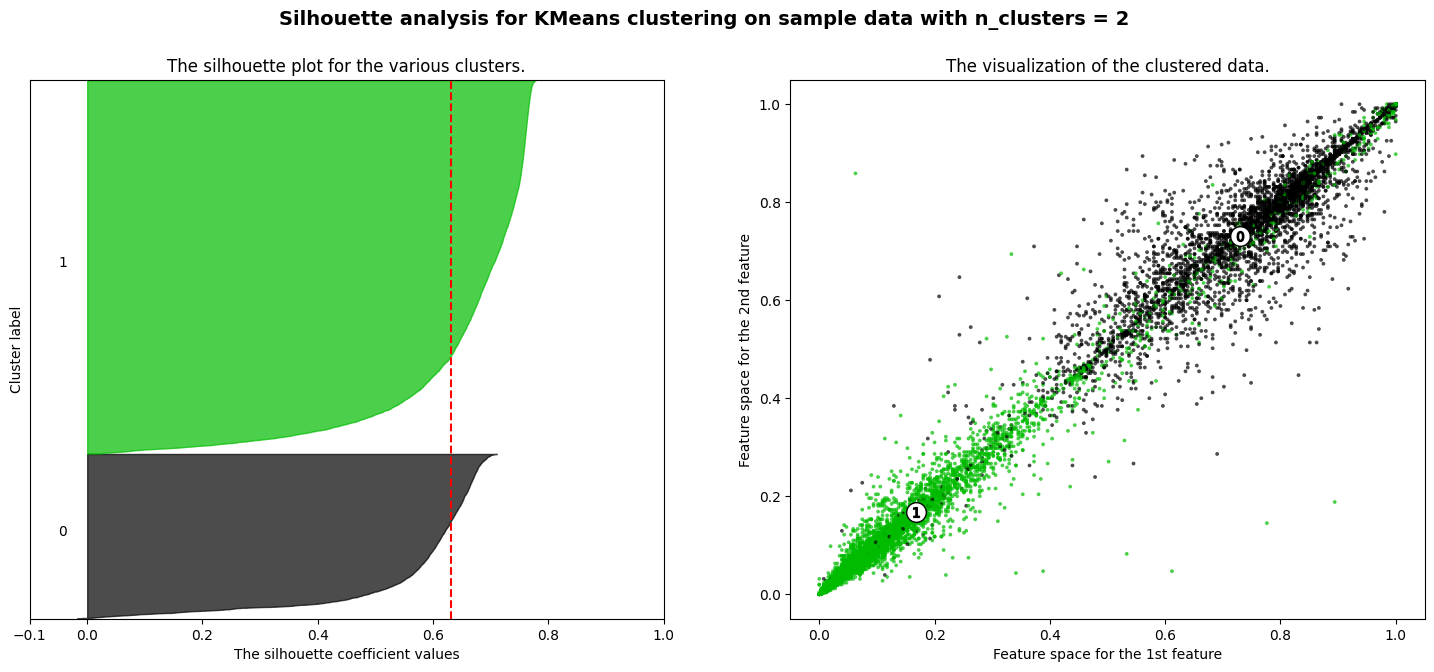

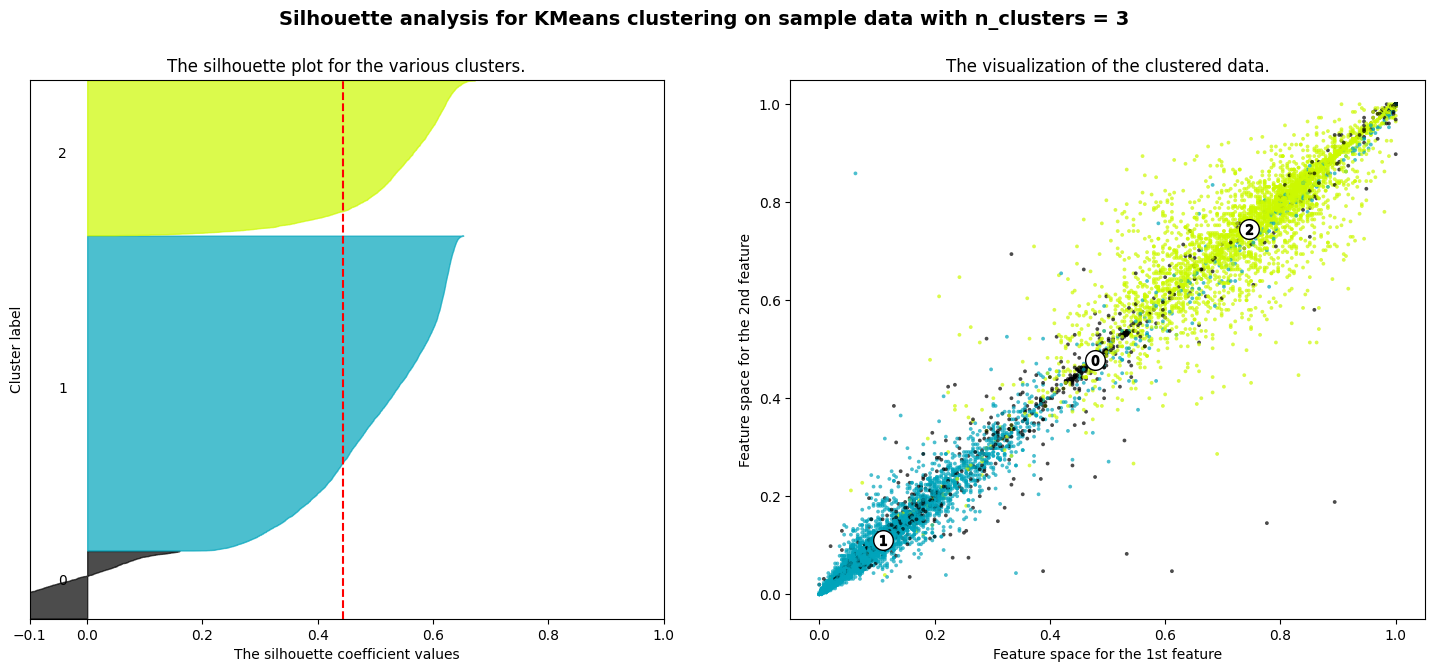

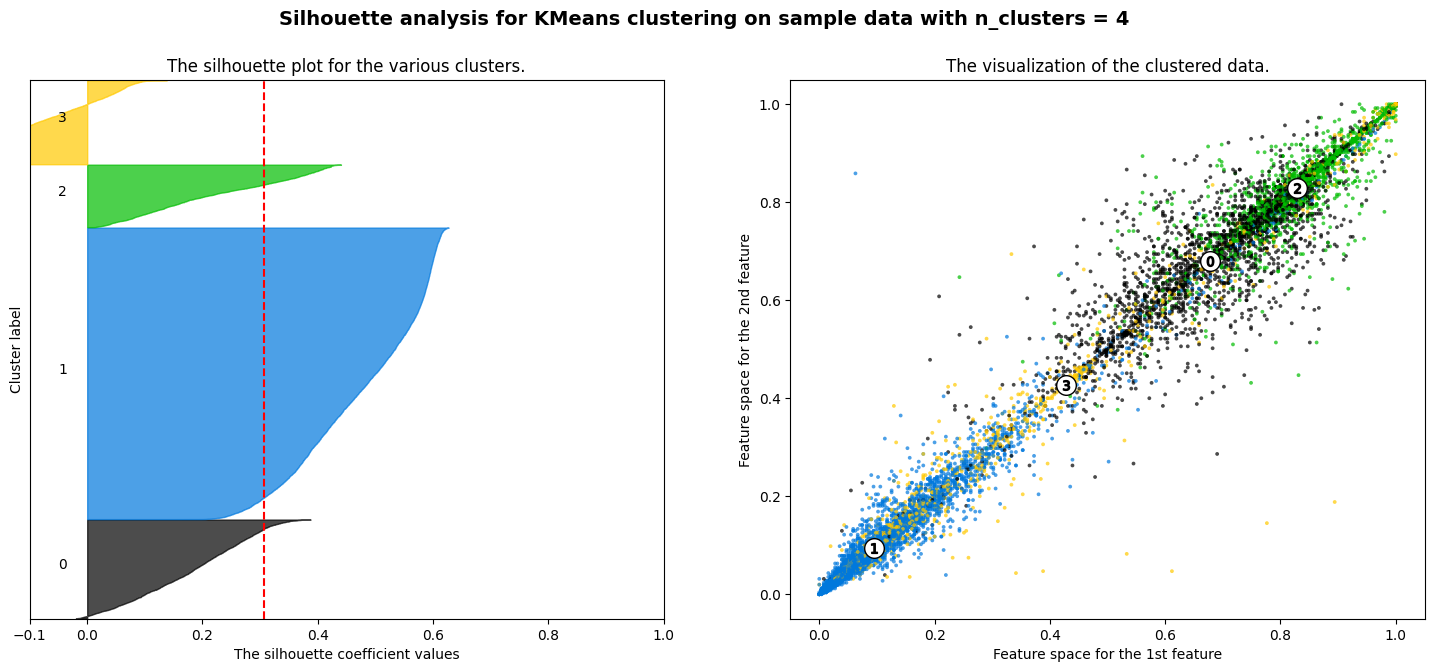

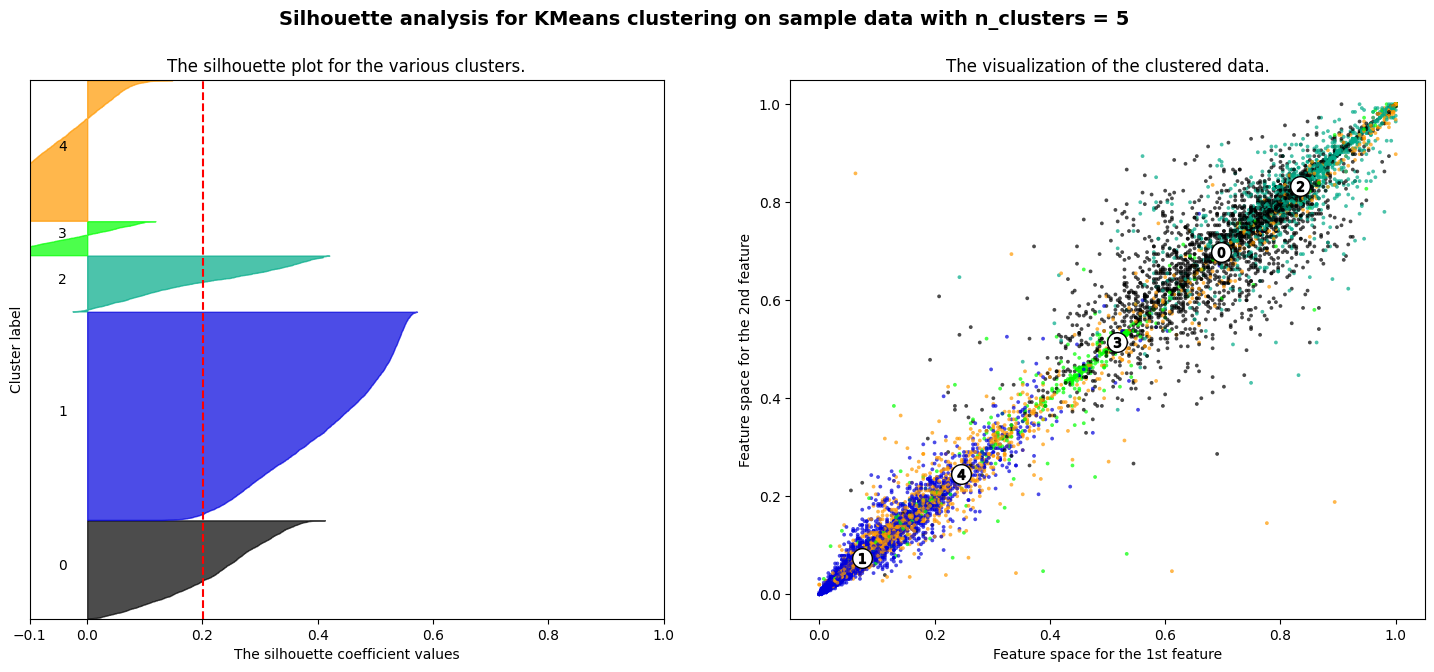

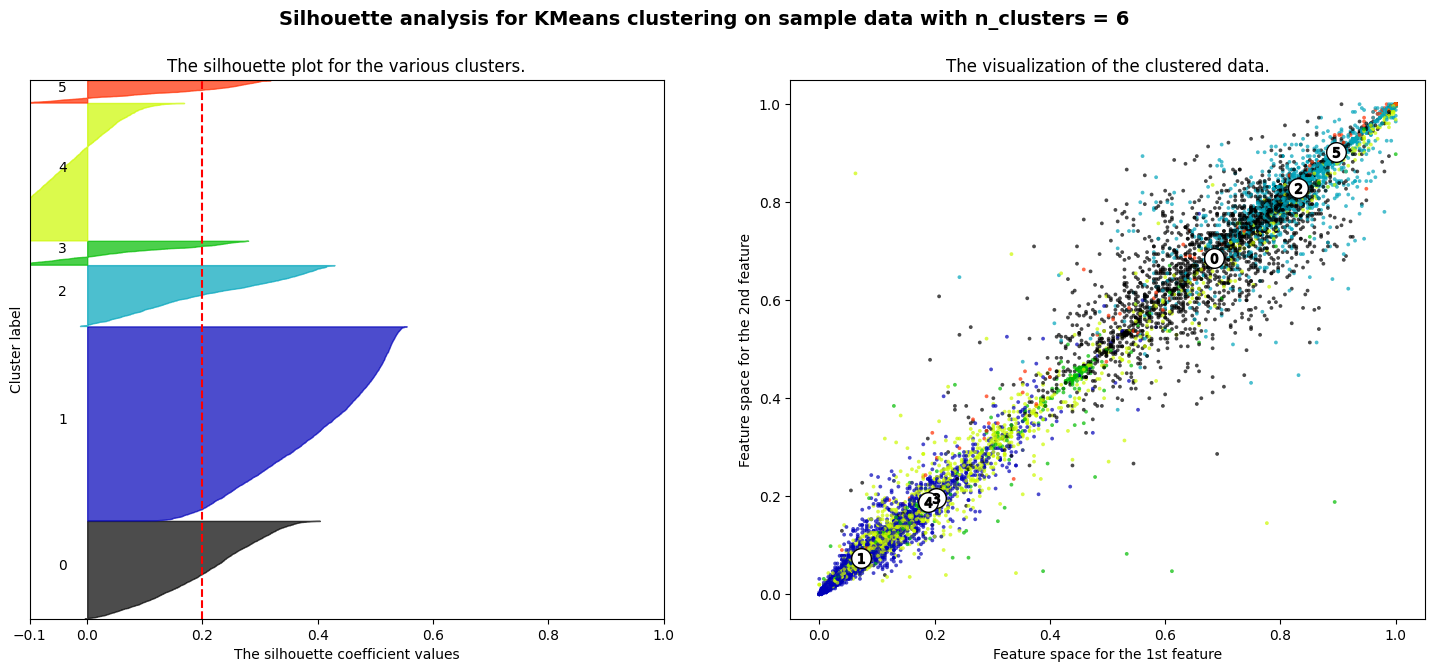

In [43]:
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
# X = np.array([list(map(int, img.split(","))) for _, img, _ in dataset_b64])
X = np.array([img for _, img, _ in dataset_b64])
y = np.array([label for _, _, label in dataset_b64])

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()